<!-- # PROJECT FOR GLOBAL AND MULTIOBJECTIVE OPTIMIZATION -->

<!-- ## Imports and hyperparameters -->

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import random
# import operator
# import math
# from functools import partial
# from collections.abc import Callable

# import sys
# import gc

# import optuna
# import logging
# import pickle

# # deap lib
# from deap import algorithms
# from deap import base
# from deap import creator
# from deap import tools
# from deap import gp

# from pso_utils import *
# from landscapes_utils import *

In [15]:
# # hyperparameters

# SWARM_SIZE = 50 # increase time x2
# NUM_ITERATIONS = 100 # increase time x5
# NUM_PROBLEMS = 100

# __standard_result_flag = False
# __original_hyperparameter_optimization_flag = False
# __gp_run_check = False # when true we can perform the run

<!-- ## Landscapes -->

<!-- The Landscapes class deals with fitness function used for PSO. It provides methods to translate (change minimum) and rotate the function. The considered functions are the following -->

In [ ]:
# for name in landscapes_names:
#     print(name)

circle
rastrigin
schaffer
rosenbrock
easom
griewank


<!-- Let's plot the functions -->

In [4]:
# # plotting utils
# lim = 5
# x = np.linspace(-lim, lim, 1000)
# y = np.linspace(-lim, lim, 1000)
# X, Y = np.meshgrid(x, y)
# X_flat, Y_flat = X.flatten(), Y.flatten()
# pts = np.array([X_flat,Y_flat]).T.copy()

<!-- All the landscapes function have one global minimum in (0, 0). They can have multiple (or none) local minima. -->

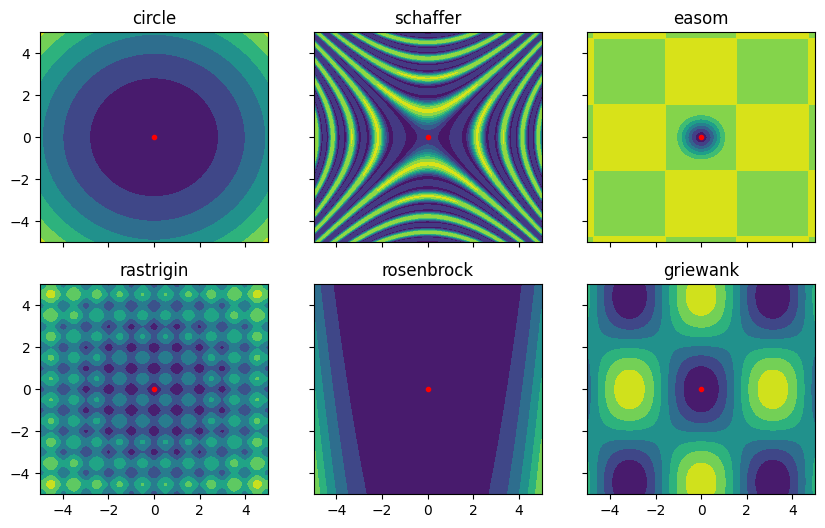

In [ ]:
# # plot standard landscapes

# fig1, axs1 = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)

# for i in range(6):
#     landscape = Landscape(landscapes_names[i], landscapes_dict[landscapes_names[i]])
#     # landscape.rotation = rotation
#     fit = landscape(pts)
#     ax = axs1[i%2, i//2]
#     ax.contourf(Y, X, fit.reshape(1000, 1000).T, alpha=1)
#     ax.scatter(landscape.minimum[0, 0], landscape.minimum[0, 1], color='red', s=9)
#     ax.set_title(landscape.name)

<!-- To improve the generalization of PSO and GP we can translate and rotate the landscapes. -->

Rotation of 45°
New minimum = (1, -2)


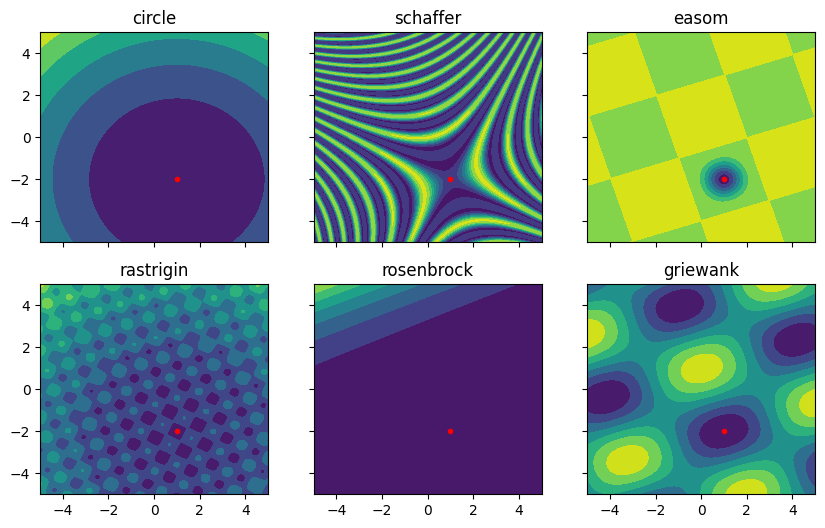

In [ ]:
# # plot rotated/translated landscapes

# angle = 0.4 # pi/4
# rotation = generate_rotation_matrix(angle*np.pi)
# minimum = np.array([[1, -2]])
# print(f'Rotation of 45°')
# print(f'New minimum = ({minimum[0, 0]}, {minimum[0, 1]})')

# fig2, axs2 = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)

# for i in range(6):
#     landscape = Landscape(landscapes_names[i], landscapes_dict[landscapes_names[i]])
#     landscape.rotation = rotation
#     landscape.minimum = minimum
#     fit = landscape(pts)
#     ax = axs2[i%2, i//2]
#     ax.contourf(Y, X, fit.reshape(1000, 1000).T, alpha=1)
#     ax.scatter(landscape.minimum[0, 0], landscape.minimum[0, 1], color='red', s=9)
#     # ax.arrow(0, 0, landscape.minimum[0, 0], landscape.minimum[0, 1], color='red')
#     ax.set_title(landscape.name)

<!-- ## PSO class -->

<!-- ### Intro -->

<!-- Example of PSO training. The star is the function optimum, the green cross is the best position found by the swarm and the red square is the center of mass of the swarm -->

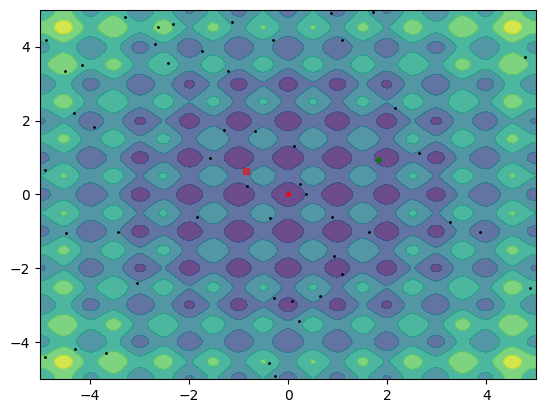

In [7]:
# S = SwarmGP(50)
# S.default_start(land=RASTRIGIN)
# fit = RASTRIGIN(pts)
# plt.contourf(Y, X, fit.reshape(1000, 1000).T, alpha=0.8)

# plt.scatter(0, 0, color='red', marker='*', s=9) # -959.64066271
# S.plot()

In [8]:
# S.generate(200)
# S.describe()

best fit value = 8.65613117539965e-06
best solution = [-2.08877063e-04 -1.34621494e-06]
center of mass = [0.03252918 0.18321679]
dispersion = 1.4892550824848931


(-5.0, 5.0)

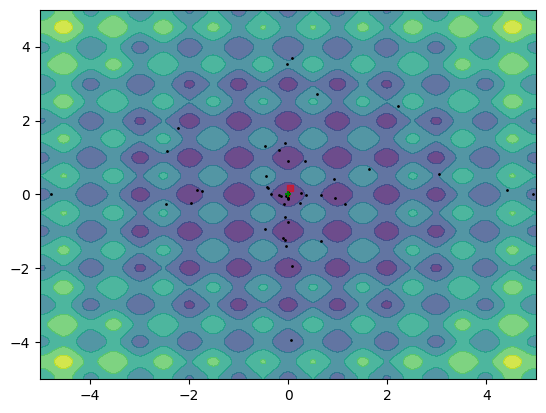

In [9]:
# plt.contourf(Y, X, fit.reshape(1000, 1000).T, alpha=0.8)

# plt.scatter(0, 0, color='red', marker='*', s=9) # -959.64066271
# S.plot()
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)

<!-- ### Hyperparameter optimization of original velocity formula -->

<!-- We calculate the performance obtained with the original parameters is 4.6689 -->

In [ ]:
# if __standard_result_flag:
#     standard_swarm = SwarmGP(SWARM_SIZE)

#     standard_results = PSOResults(standard_swarm, generate_problems(NUM_PROBLEMS), NUM_ITERATIONS)

#     standard_value = float(np.median(standard_results) + np.std(standard_results))
#     standard_value

4.668986969116965

<!-- We try to optimize the social factor, cognitive factor and inertia weight of the original velocity update. -->

In [11]:
# def original_update_dec(soc_factor, cog_factor, inertia_weight):
#     """Decorator used to fix some parameters of the original velocity update"""

#     def new_update(n, swarm, velocity, global_best, personal_best, center_mass, dispersion):
#         return original_update(n, swarm, velocity, global_best, personal_best, center_mass, dispersion, soc_factor=soc_factor, cog_factor=cog_factor, inertia_weight=inertia_weight)
#     return new_update

In [12]:
# def GPObjective(trial):
#     """Objective function for the hyperparameter optimization"""
    
#     soc_factor = trial.suggest_float('soc_factor', 0, 5)
#     cog_factor = trial.suggest_float('cog_factor', 0, 5)
#     inertia_weight = trial.suggest_float('inertia_weight', 0, 5)
#     vel_update = original_update_dec(soc_factor, cog_factor, inertia_weight)


#     results = PSOResults(swarm, generate_problems(NUM_PROBLEMS), NUM_ITERATIONS)

#     return float(np.median(results) + np.std(results))

In [13]:
# study_name = "optimization_folder/modular_version1"  # Unique identifier of the study.
# storage_name = "sqlite:///{}.db".format(study_name)
# study = optuna.create_study(study_name=study_name, storage=storage_name, direction="minimize", load_if_exists=True)

# if __original_hyperparameter_optimization_flag:
#     study.optimize(GPObjective, n_trials=200, )

[I 2024-12-16 19:28:25,483] Using an existing study with name 'optimization_folder/modular_version1' instead of creating a new one.


<!-- The best parameters obtained are: -->

In [69]:
# print(f'best parameters -> {study.best_params}')
# print(f'best value -> {study.best_value}')

best parameters -> {'soc_factor': 0.37098323712381176, 'cog_factor': 2.4430009951118525, 'inertia_weight': 0.15780578019083405}
best value -> 2.216855343261271


## Genetic programming

<!-- # GP -->

<!-- # string representation -->

In [149]:
# operations = [
#     'negative',
#     'subtract',
#     'multiply',
#     'negate',
#     'add',
# ]

In [ ]:
# expr = 'multiply(multiply(subtract(add(add(multiply(add(subtract(multiply(negative(negative(1.2061382054913272)), multiply(multiply(3.141592653589793, 2.792975412630669), negative(swarm))), subtract(subtract(multiply(1.3535018756499855, swarm), add(swarm, 1)), add(negative(1), multiply(center, gbest)))), negative(add(subtract(negative(dispersion), add(3.141592653589793, gbest)), negative(add(3.420888396619452, gbest))))), negative(add(multiply(multiply(add(4.546230784165469, 1), subtract(1.2863324133037861, dispersion)), add(negative(swarm), subtract(3.141592653589793, 1))), subtract(multiply(subtract(1, gbest), negative(3.141592653589793)), multiply(negative(center), subtract(swarm, 3.141592653589793)))))), add(multiply(add(add(subtract(multiply(3.141592653589793, 4.867982913485721), negative(1)), subtract(negative(3.141592653589793), negative(pbest))), negative(multiply(subtract(dispersion, 3.141592653589793), add(swarm, pbest)))), negative(negative(subtract(add(gbest, 3.865779421527601), negative(dispersion))))), subtract(add(multiply(negative(subtract(0.9117810978010121, 3.141592653589793)), subtract(negative(swarm), add(3.141592653589793, 1))), add(subtract(add(center, 3.141592653589793), add(gbest, pbest)), subtract(negative(3.141592653589793), add(3.141592653589793, gbest)))), negative(subtract(multiply(multiply(3.141592653589793, dispersion), multiply(2.1480037908235285, 3.898786075691051)), add(negative(vel), add(0.6306849011410331, 1))))))), add(add(multiply(multiply(subtract(subtract(subtract(2.9594382282107046, center), subtract(3.141592653589793, 1)), subtract(negative(2.2875709305324436), negative(1.960091850902674))), multiply(multiply(add(vel, pbest), add(4.168135108081047, swarm)), negative(add(0.8440895212388716, dispersion)))), add(subtract(multiply(multiply(dispersion, 3.649539204718388), multiply(1, 3.141592653589793)), subtract(subtract(3.141592653589793, pbest), add(1, swarm))), multiply(negative(multiply(vel, dispersion)), multiply(subtract(vel, gbest), subtract(dispersion, 3.141592653589793))))), add(negative(add(subtract(add(pbest, pbest), negative(3.141592653589793)), negative(subtract(3.8726259990413188, vel)))), add(add(subtract(add(4.891222005503547, 3.1188397983779885), negative(center)), subtract(add(pbest, 1), multiply(1.5875930653304997, center))), negative(subtract(multiply(3.141592653589793, center), multiply(4.96315112781103, 1)))))), negative(negative(add(add(negative(add(1, center)), negative(subtract(vel, pbest))), subtract(multiply(multiply(4.947735318630717, 3.81013802537399), subtract(1, 1)), multiply(negative(1), add(1.9886957956258815, 3.141592653589793)))))))), multiply(multiply(add(negative(negative(multiply(multiply(add(gbest, pbest), subtract(gbest, 1)), multiply(add(dispersion, center), subtract(gbest, 1))))), subtract(negative(negative(multiply(multiply(swarm, vel), add(swarm, swarm)))), subtract(add(multiply(negative(0.3488706273004333), add(pbest, pbest)), negative(multiply(1, pbest))), multiply(subtract(negative(1.6755814500064825), subtract(dispersion, center)), multiply(add(1, gbest), subtract(pbest, swarm)))))), add(multiply(multiply(subtract(multiply(subtract(1, swarm), add(4.697687523607856, center)), add(negative(center), subtract(dispersion, 1.1012160510907716))), negative(add(negative(0.7284371899355035), negative(2.449513409030617)))), subtract(negative(subtract(negative(1), add(dispersion, pbest))), subtract(add(add(swarm, center), add(swarm, 1.547079513370106)), add(multiply(vel, center), multiply(swarm, 3.141592653589793))))), add(subtract(negative(subtract(subtract(swarm, gbest), add(3.7044989180215304, 1))), add(subtract(subtract(3.141592653589793, swarm), subtract(swarm, 3.2571538668016933)), subtract(negative(gbest), negative(1)))), add(subtract(add(subtract(gbest, 3.141592653589793), multiply(4.746867677774674, 4.4124716094441725)), subtract(subtract(gbest, 1.9275867122325474), add(2.0590176411432184, gbest))), multiply(negative(multiply(3.141592653589793, swarm)), subtract(add(gbest, 1), multiply(dispersion, 0.5784340786940689))))))), multiply(negative(add(add(multiply(multiply(add(4.5687225958050774, swarm), subtract(vel, 2.5948628143618064)), add(multiply(gbest, 3.1039950298291936), multiply(1, 1.5963408883942116))), add(add(negative(3.141592653589793), add(dispersion, swarm)), add(subtract(vel, gbest), add(center, gbest)))), negative(add(multiply(multiply(pbest, gbest), negative(4.691390212366899)), add(add(3.570690305836232, 3.9361621886539306), add(pbest, center)))))), negative(negative(add(add(subtract(add(4.394315002721117, center), multiply(center, gbest)), multiply(add(center, 1.122853261679408), subtract(swarm, center))), subtract(add(multiply(vel, 1), multiply(gbest, swarm)), add(multiply(gbest, swarm), subtract(pbest, dispersion))))))))), add(negative(add(multiply(negative(negative(add(multiply(negative(center), add(4.922313189646266, 1)), subtract(subtract(swarm, 1.9922083408502456), add(1.5378556367200051, 4.662107875563425))))), negative(multiply(multiply(add(subtract(dispersion, 3.141592653589793), multiply(center, 3.141592653589793)), multiply(multiply(3.0413876277008702, swarm), negative(1))), add(negative(negative(pbest)), multiply(negative(vel), multiply(3.141592653589793, 3.141592653589793)))))), subtract(negative(subtract(negative(negative(negative(1))), negative(multiply(negative(2.1097322707409925), multiply(swarm, 4.6001442712698974))))), subtract(multiply(subtract(multiply(add(center, 4.99908610800761), add(0.3224860993788303, dispersion)), subtract(multiply(0.2701579732855519, pbest), multiply(2.575995404941348, 1))), negative(multiply(negative(3.9857629551265603), multiply(1, 0.6044039500847459)))), subtract(multiply(multiply(negative(pbest), multiply(4.530453391139108, vel)), subtract(subtract(pbest, 3.7945203139076753), subtract(1.3275245123142054, dispersion))), subtract(negative(add(dispersion, 1)), subtract(multiply(3.141592653589793, 4.483364438848042), subtract(gbest, center)))))))), multiply(add(add(add(add(subtract(subtract(subtract(2.7514070932985275, swarm), subtract(vel, 1)), subtract(multiply(swarm, swarm), multiply(gbest, gbest))), subtract(multiply(add(3.141592653589793, gbest), subtract(pbest, 0.45488804463832466)), negative(subtract(3.141592653589793, 1.0897868079565776)))), negative(multiply(subtract(multiply(swarm, 1), subtract(gbest, center)), subtract(multiply(dispersion, 0.8271796319794023), negative(dispersion))))), negative(add(negative(add(add(dispersion, 0.3973684845530673), add(1, 3.960434018581536))), subtract(subtract(subtract(center, swarm), negative(4.04865319917576)), subtract(add(vel, swarm), negative(center)))))), add(negative(subtract(add(add(add(3.141592653589793, gbest), add(swarm, 2.4405970173180584)), subtract(negative(gbest), subtract(dispersion, 3.141592653589793))), add(subtract(subtract(pbest, gbest), multiply(center, center)), negative(subtract(0.9258007995010331, 3.434582435432512))))), subtract(multiply(add(multiply(subtract(pbest, center), multiply(4.0754461106211455, pbest)), add(negative(swarm), subtract(2.4396754472515445, dispersion))), multiply(add(negative(pbest), multiply(swarm, center)), negative(multiply(pbest, 1.5273982709093143)))), multiply(negative(multiply(multiply(1.2639232818488084, 1.2760818355068715), negative(4.669112760737989))), add(add(multiply(pbest, dispersion), multiply(center, dispersion)), negative(subtract(dispersion, center))))))), negative(subtract(subtract(add(subtract(add(negative(1), negative(gbest)), negative(negative(vel))), negative(multiply(multiply(1, swarm), multiply(1, swarm)))), subtract(add(multiply(subtract(dispersion, 1.479284817125387), add(3.6738471008987075, 0.8640386709067627)), subtract(subtract(dispersion, 0.35136573225063195), subtract(dispersion, vel))), multiply(negative(negative(3.7973830938704767)), multiply(subtract(vel, gbest), add(1, 1))))), negative(subtract(add(add(negative(3.7664409359798663), negative(vel)), multiply(subtract(pbest, 3.5408966730252778), subtract(4.61764275214489, 2.8279558055960843))), subtract(subtract(subtract(0.4202708515333098, center), multiply(3.141592653589793, dispersion)), subtract(add(vel, gbest), multiply(2.1110606004821704, gbest)))))))))), negative(negative(add(negative(add(subtract(multiply(multiply(multiply(negative(vel), negative(pbest)), negative(subtract(center, center))), subtract(subtract(add(1.3468062365494482, dispersion), add(vel, dispersion)), subtract(add(swarm, gbest), add(gbest, dispersion)))), multiply(subtract(subtract(negative(dispersion), negative(swarm)), add(multiply(vel, swarm), add(dispersion, vel))), multiply(subtract(subtract(1, center), add(1, vel)), negative(subtract(swarm, 4.756204659805515))))), add(add(negative(add(subtract(1.6856633437357793, pbest), subtract(pbest, pbest))), negative(negative(add(pbest, swarm)))), negative(add(add(subtract(pbest, pbest), add(dispersion, vel)), multiply(multiply(3.474463246094275, swarm), negative(1))))))), negative(negative(negative(multiply(negative(subtract(multiply(dispersion, 1.80219060315008), multiply(pbest, pbest))), multiply(negative(negative(gbest)), add(negative(3.141592653589793), add(4.648141601845731, gbest)))))))))))'

In [ ]:
# 'subtract(subtract(negative(multiply(subtract(1.2375081118745572, center), negative(add(subtract(dispersion, 0.5142041335443548), 3.719699770076712)))), negative(negative(subtract(1.1229994919240687 + 1 + gbest -vel), 3.141592653589793)))), -swarm * [ - 3.2178005605337567 * 3.141592653589793  - dispersion + center]))))'